### Principles of Machine Learning
##### Student Name:- Sahil Chitnis 
##### Class:- MSc Data Analytics
##### Student ID:-  23100637

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from scipy.stats import ttest_rel

from researchpy import ttest as rpTtest


from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score 
from sklearn import metrics

## Checking if there are any missing values or not

In [2]:
'''
In this cell we import the dataset and into Stress_Predict_dataset_df and use the isnull() function to check if there are 
any null values present in any of the attributes, this is one of the pre-processing steps which needs to be carrried out inorder
to understand and clean the dataset.
''' 

Stress_Predict_dataset_df=pd.read_csv('D:/University of galway/CT5165(Principles of Machine Learning)/Assignments/Improved_All_Combined_hr_rsp_binary.csv')
Stress_Predict_dataset_df.rename(columns = {'HR':'Heart_Rate','respr':'Respiratory_Rate'}, inplace = True)
Stress_Predict_dataset_df[Stress_Predict_dataset_df.isnull().any(axis=1)].head()

,Participant,Heart_Rate,Respiratory_Rate,Time(sec),Label
3555,2,NaN,14.231310,1644231138,0
3556,2,NaN,14.188643,1644231139,0
6865,3,NaN,9.682747,1644234689,0
10395,4,NaN,14.054357,1644236927,0
10396,4,NaN,14.022357,1644236928,0


#### In this data set we do not require the attribute Time(Sec), so we need to remove that particular attribute. As we can calculate if a participant is stressed or not based on their Heartrate and respiratory values.

In [3]:
Stress_Predict_dataset_df.drop(['Time(sec)','Participant'],inplace=True, axis=1)

In [4]:
Stress_Predict_dataset_df.head()

,Heart_Rate,Respiratory_Rate,Label
0,118.00,12.127693,0
1,113.50,12.127693,0
2,93.00,12.127693,0
3,93.25,12.127693,0
4,86.40,12.127693,0


## Removing the missing values from the dataset.

##### As the dataset is small in size we can remove the missing values from the dataset.

In [5]:
pre_processed_data=Stress_Predict_dataset_df.dropna(axis=0)

In [6]:
pre_processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112472 entries, 0 to 112515
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Heart_Rate        112472 non-null  float64
 1   Respiratory_Rate  112472 non-null  float64
 2   Label             112472 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.4 MB


In [7]:
pre_processed_data.head()

,Heart_Rate,Respiratory_Rate,Label
0,118.00,12.127693,0
1,113.50,12.127693,0
2,93.00,12.127693,0
3,93.25,12.127693,0
4,86.40,12.127693,0


## Checking for imbalanced dataset.

In [8]:
imb_chk=pd.value_counts(pre_processed_data["Label"],sort=True)
imb_chk

0    75657
1    36815
Name: Label, dtype: int64

Text(0.5, 0, 'Stressed or not Stressed')

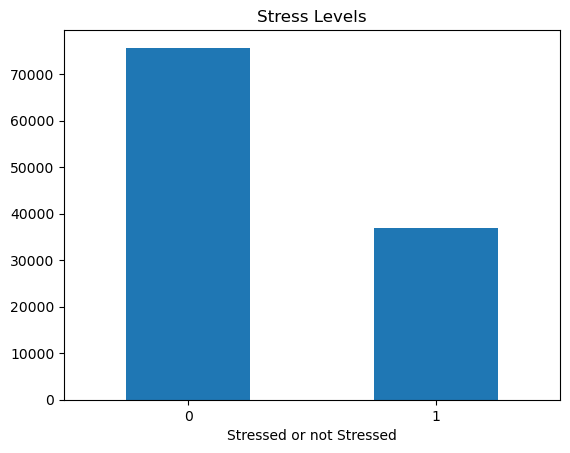

In [9]:
imb_chk.plot(kind="bar",rot=0)
plt.title("Stress Levels")
plt.xlabel("Stressed or not Stressed")

#### Data Splitting into Train and Test Dataset after preprocessing.

In [10]:
X = pre_processed_data.drop(['Label'],axis = 1)
y= pre_processed_data['Label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)


## Decision Tree Algorithm

In [11]:
model= DecisionTreeClassifier().fit(X_train,y_train)
predictions=model.predict(X_test)

## Visualization of Decision Tree

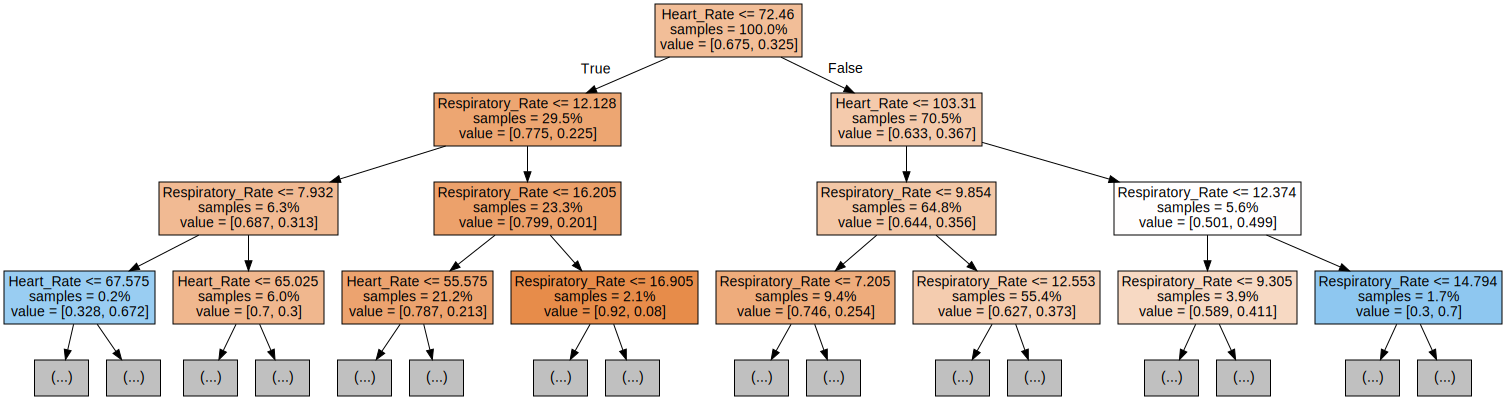

In [12]:
# Here we are visualizing the decision tree with the help of graphviz library with a maximum depth of 2.
dot_data = export_graphviz(model,
                           feature_names=X_train.columns,  
                           filled=True,  
                           max_depth=3, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### ROC before Hyperparameter Tuning

roc_auc_score for DecisionTree before Hyperparameter tuning:  0.6728378134623432


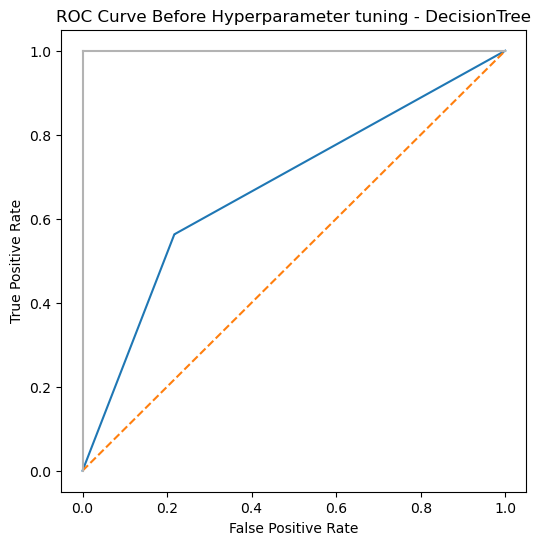

In [591]:
# We are storing the predicted class for decision tree model and we will use it to get the ROC AUC score.
y_score1 = model.predict_proba(X_test)[:,1]

# We need the False Positive Rates and True Postive rates for the Classifier because these are used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree before Hyperparameter tuning: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(6,6))
plt.title('ROC Curve Before Hyperparameter tuning - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Confusion Matrix Before Hyperparameter Tuning

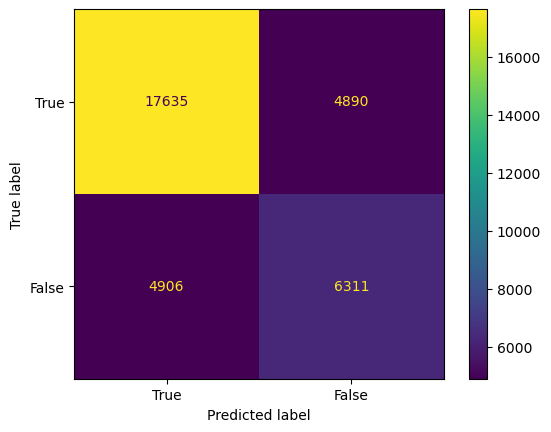

Accuracy: 70.96793313970718 %
Precision: 56.34318364431748 %
Recall: 56.2628153695284 %
F1_Score: 56.30297082701401 %


In [592]:
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
F1_Score_Dec_Tree = 2 * (precision * recall) / (precision + recall)


confusion_matrix = metrics.confusion_matrix(y_test, predictions)

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
display_confusion_matrix.plot()
plt.show()

print("Accuracy:", accuracy * 100,"%")
print("Precision:", precision * 100,"%")
print("Recall:", recall * 100,"%")
print("F1_Score:", F1_Score_Dec_Tree * 100,"%")

In [593]:
k_fold_acc_dt = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = 10)
k_fold_prec_dt = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "precision", cv = 10)
k_fold_rec_dt = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "recall", cv = 10)
k_fold_f1_dt = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "f1", cv = 10)
k_fold_auc_dt = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "roc_auc", cv = 10)

In [594]:
val_set_index = list(range(1,11))

In [595]:
metrics_dt = pd.DataFrame(list(zip(val_set_index, k_fold_acc_dt*100, k_fold_prec_dt*100, k_fold_rec_dt*100, k_fold_f1_dt*100, k_fold_auc_dt)), columns = ["Validation set #", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
metrics_dt =  metrics_dt.round(2)
metrics_dt.set_index("Validation set #")

,Accuracy,Precision,Recall,F1-Score,AUC
Validation set #,,,,,
1,71.56,55.59,58.54,56.90,0.68
2,70.53,55.24,55.61,55.46,0.67
3,70.66,55.05,55.16,54.88,0.66
4,69.83,53.80,54.34,53.45,0.66
5,70.58,54.53,54.92,54.76,0.67
6,71.74,55.99,57.19,56.58,0.68
7,71.62,56.53,55.98,57.05,0.68
8,70.68,55.09,55.55,55.48,0.67
9,69.80,53.72,55.59,54.71,0.67


In [596]:
print(f"Average accuracy: {round((k_fold_acc_dt*100).mean(), 2)} ± {round((k_fold_acc_dt*100).std(), 2)}")
print(f"Average precision: {round((k_fold_prec_dt*100).mean(), 2)} ± {round((k_fold_prec_dt*100).std(), 2)}")
print(f"Average recall: {round((k_fold_rec_dt*100).mean(), 2)} ± {round((k_fold_rec_dt*100).std(), 2)}")
print(f"Average F1 score: {round((k_fold_f1_dt*100).mean(), 2)} ± {round((k_fold_f1_dt*100).std(), 2)}")
print(f"Average AUC: {round((k_fold_auc_dt).mean(), 2)} ± {round((k_fold_auc_dt).std(), 3)}")

Average accuracy: 70.89 ± 0.73
Average precision: 55.17 ± 0.9
Average recall: 55.84 ± 1.14
Average F1 score: 55.52 ± 1.07
Average AUC: 0.67 ± 0.007


## Performing Hyperparameter Tuning for DECISION TREE

In [597]:
# In this section we are performing hyperparameter tuning with the help of GridSearchCV which is a library in sklearn.
# Cross validation will split the data into folds, in which each fold will act as a validation set one time. In this step, Kfold
# function is also used inorder to decide the folds, each fold is then used once as a validation set while 
# the k - 1 remaining folds form the training set.


params = {'max_depth':[3,5,7,10,15,20,25],
          'min_samples_leaf':[3,5,10,15,20,25],
          'min_samples_split':[8,10,12,18,20,16,24],
          'criterion':['gini','entropy']}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
Randomised_cv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=kfold,n_iter=300,n_jobs=-1, verbose=True, scoring='accuracy')

In [598]:
model=Randomised_cv.fit(X_train, y_train)
model

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=300, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 15, 20, 25],
                                        'min_samples_leaf': [3, 5, 10, 15, 20,
                                                             25],
                                        'min_samples_split': [8, 10, 12, 18, 20,
                                                              16, 24]},
                   scoring='accuracy', verbose=True)

### ROC after Hyperparameter Tuning for DECISION TREE

roc_auc_score for DecisionTree after Hyperparameter Tuning:  0.7469176750011899


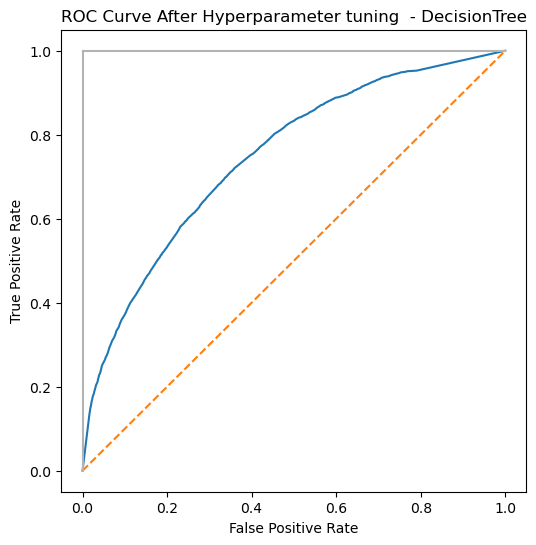

In [599]:
# We are storing the predicted class for decision tree model and we will use it to get the ROC AUC score.
y_score1 = model.predict_proba(X_test)[:,1]

#We need the False Positive Rates and True Postive rates for the Classifier because these are used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree after Hyperparameter Tuning: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(6,6))
plt.title('ROC Curve After Hyperparameter tuning  - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [600]:
Best_Parameters=Randomised_cv.best_params_
Best_Score=Randomised_cv.best_score_

predictions2=model.predict(X_test)

print('Best Parameters:',Best_Parameters,end='\n')
print('Best Score:',Best_Score)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'gini'}
Best Score: 0.7210847199288709


## Confusion Matrix After Performing Hyperparameter Tuning for DECISION TREE

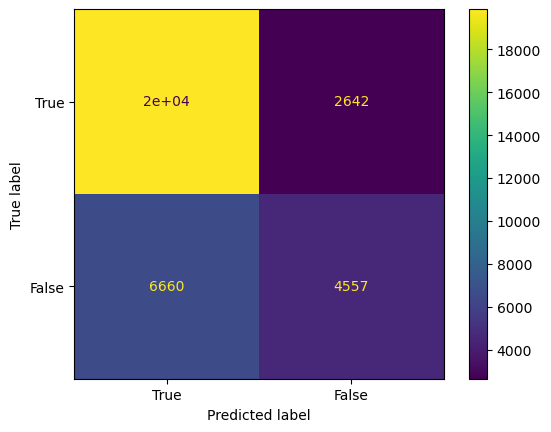

Accuracy: 70.96793313970718 %
Precision: 63.30045839699958 %
Recall: 40.62583578496925 %
F1_Score: 49.48957428323196 %


In [601]:
accuracy_Dec_Tree = accuracy_score(y_test,predictions2)
precision = precision_score(y_test, predictions2)
recall = recall_score(y_test, predictions2)
F1_Score_Dec_Tree = 2 * (precision * recall) / (precision + recall)


confusion_matrix = metrics.confusion_matrix(y_test, predictions2)

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
display_confusion_matrix.plot()
plt.show()

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")
print("F1_Score:", F1_Score_Dec_Tree*100,"%")

## Random Forest Algorithm

In [13]:
model2= RandomForestClassifier().fit(X_train,y_train)
predictions_Rand=model2.predict(X_test)

### Visualization of Random Forest

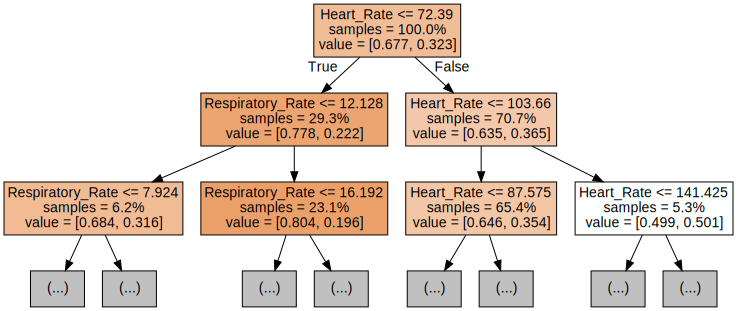

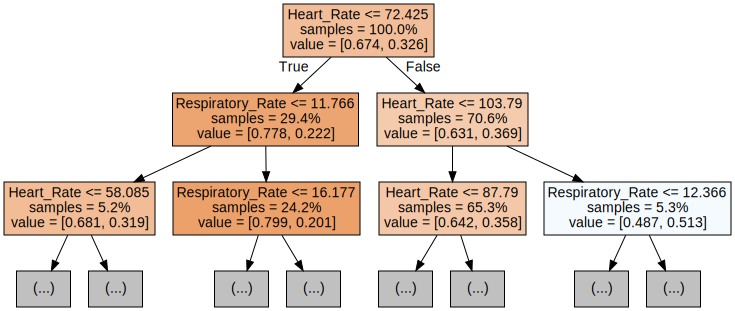

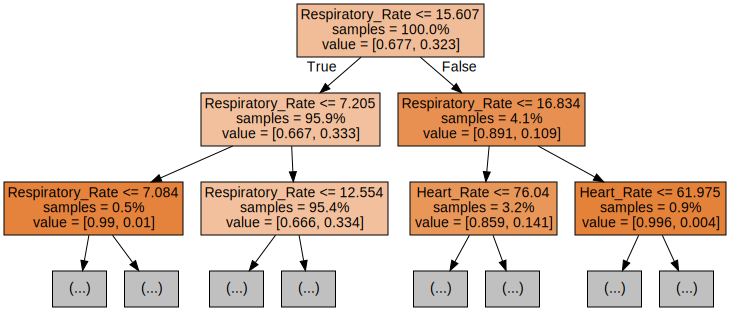

In [14]:
#running a forloop inorder to generate the random forest, the tree variable takes the list of trees.

for i in range(3):
    tree = model2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## ROC before Hyperparameter Tuning for RANDOM FOREST

In [15]:
# We are storing the predicted class for random forest model and we will use it to get the ROC AUC score.
y_score1 = model2.predict_proba(X_test)[:,1]

#We need the False Positive Rates and True Postive rates for the Classifier because these are used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.7824933337568226


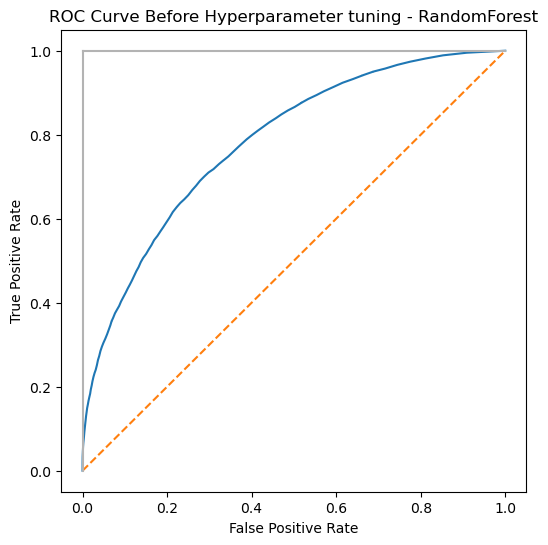

In [16]:
plt.subplots(1, figsize=(6,6))
plt.title('ROC Curve Before Hyperparameter tuning - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Confusion Matrix Before Hyperparameter Tuning For RANDOM FOREST

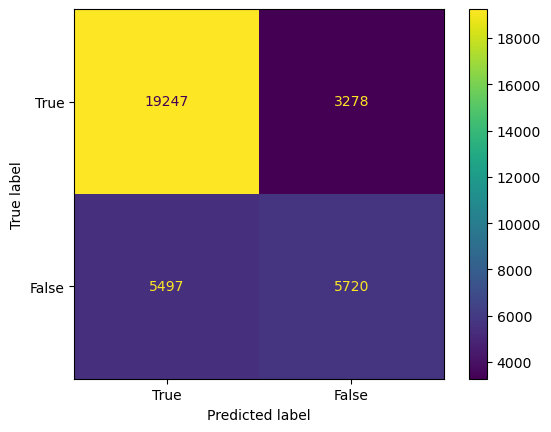

Accuracy: 73.9938355758402 %
Precision: 63.56968215158925 %
Recall: 50.99402692341981 %
F1 Score: 56.59163987138264 %


In [616]:
accuracy = accuracy_score(y_test,predictions_Rand)
precision = precision_score(y_test, predictions_Rand)
recall = recall_score(y_test, predictions_Rand)
F1_Score_Rand_For = 2 * (precision * recall) / (precision + recall)

confusion_matrix = metrics.confusion_matrix(y_test, predictions_Rand)

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
display_confusion_matrix.plot()
plt.show()

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")
print("F1 Score:", F1_Score_Rand_For*100,"%")


In [617]:
k_fold_acc_RF = cross_val_score(estimator = model2, X = X_train, y = y_train, scoring = "accuracy", cv = 10)
k_fold_prec_RF = cross_val_score(estimator = model2, X = X_train, y = y_train, scoring = "precision", cv = 10)
k_fold_rec_RF = cross_val_score(estimator = model2, X = X_train, y = y_train, scoring = "recall", cv = 10)
k_fold_f1_RF = cross_val_score(estimator = model2, X = X_train, y = y_train, scoring = "f1", cv = 10)
k_fold_auc_RF = cross_val_score(estimator = model2, X = X_train, y = y_train, scoring = "roc_auc", cv = 10)

In [618]:
val_set_index = list(range(1,11))

In [619]:
metrics_RF = pd.DataFrame(list(zip(val_set_index, k_fold_acc_RF*100, k_fold_prec_RF*100, k_fold_rec_RF*100, k_fold_f1_RF*100, k_fold_auc_RF)), columns = ["Validation set #", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
metrics_RF =  metrics_RF.round(2)
metrics_RF.set_index("Validation set #")

,Accuracy,Precision,Recall,F1-Score,AUC
Validation set #,,,,,
1,74.47,63.01,52.83,57.46,0.79
2,73.96,62.28,50.37,56.16,0.78
3,74.09,62.78,49.96,55.42,0.77
4,73.75,61.80,50.82,56.22,0.77
5,73.76,62.97,50.35,56.07,0.77
6,74.33,63.41,51.21,56.97,0.78
7,74.44,63.39,50.86,56.29,0.78
8,73.89,61.69,49.22,55.51,0.77
9,73.77,61.80,51.80,55.93,0.77


In [620]:
print(f"Average accuracy: {round((k_fold_acc_RF*100).mean(), 2)} ± {round((k_fold_acc_RF*100).std(), 2)}")
print(f"Average precision: {round((k_fold_prec_RF*100).mean(), 2)} ± {round((k_fold_prec_RF*100).std(), 2)}")
print(f"Average recall: {round((k_fold_rec_RF*100).mean(), 2)} ± {round((k_fold_rec_RF*100).std(), 2)}")
print(f"Average F1 score: {round((k_fold_f1_RF*100).mean(), 2)} ± {round((k_fold_f1_RF*100).std(), 2)}")
print(f"Average AUC: {round((k_fold_auc_RF).mean(), 2)} ± {round((k_fold_auc_RF).std(), 3)}")

Average accuracy: 74.11 ± 0.32
Average precision: 62.76 ± 0.85
Average recall: 50.73 ± 0.99
Average F1 score: 56.25 ± 0.58
Average AUC: 0.78 ± 0.006


## Hyperparameter Tuning for RANDOM FOREST

In [17]:
Hyper_param_RF =  RandomForestClassifier()
params = {'max_depth':[3,5,7,10,15,20],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
Randomised_cv = RandomizedSearchCV(estimator=Hyper_param_RF,param_distributions=params,cv=kfold,n_iter=300,n_jobs=-1, verbose=True, scoring='accuracy')

In [ ]:
# ROC after parameter tuning
model2=Randomised_cv.fit(X_train, y_train)
model2

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [429]:
Best_Parameters= Randomised_cv.best_params_
Best_Score= Randomised_cv.best_score_
predictions_Rand=Randomised_cv.predict(X_test)

print('Best Parameters:',Best_Parameters,end='\n')
print('Best Score:',Best_Score)

Best Parameters: {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'gini'}
Best Score: 0.7489267115457895


## ROC after Hyperparameter Tuning for RANDOM FOREST

In [535]:
y_score1 = model2.predict_proba(X_test)[:,1]

#We need the False Positive Rates and True Postive rates for the Classifier because these are used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
auc = auc(false_positive_rate1, true_positive_rate1) # Random Forest

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.7809832249824544


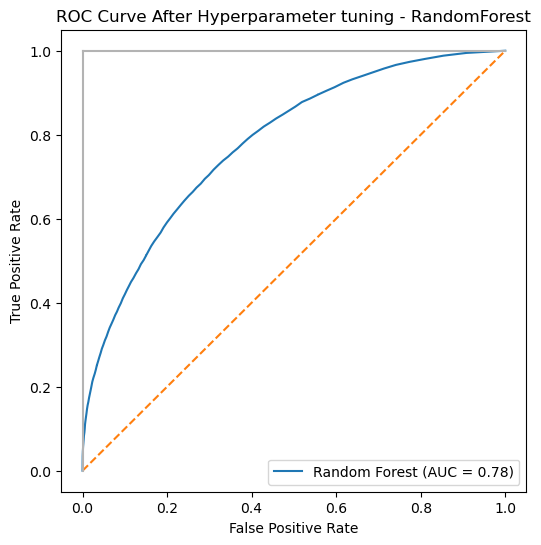

In [537]:
plt.subplots(1, figsize=(6,6))
plt.title('ROC Curve After Hyperparameter tuning - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1,label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix after performing Hyperparameter Tuning for Random Forest

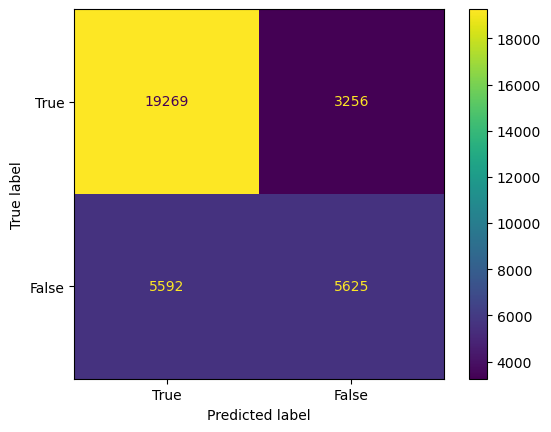

Accuracy: 73.77748799715488 %
Precision: 63.3374619975228 %
Recall: 50.147098154586786 %
F1 Score: 55.97571897701265 %


In [540]:
accuracy_Rand_Forest = accuracy_score(y_test,predictions_Rand)
precision = precision_score(y_test, predictions_Rand)
recall = recall_score(y_test, predictions_Rand)
F1_Score_Rand_For = 2 * (precision * recall) / (precision + recall)

confusion_matrix = metrics.confusion_matrix(y_test, predictions_Rand)

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
display_confusion_matrix.plot()
plt.show()

print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100,"%")
print("Recall:", recall*100,"%")
print("F1 Score:", F1_Score_Rand_For*100,"%")


## Comparing ROC for both the models

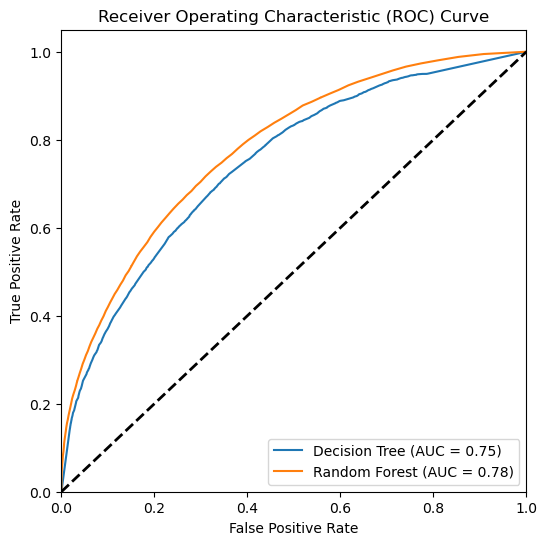

In [531]:
#Decision Tree

# We are storing the predicted class for decision tree model and we will use it to get the ROC AUC score.
y_score1 = model.predict_proba(X_test)[:,1] # Decision Tree
y_score2 = model2.predict_proba(X_test)[:,1] # Random Forest


#We need the False Positive Rates and True Postive rates for the Classifier because these are used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)


auc1 = auc(false_positive_rate1, true_positive_rate1) # Decision Tree
auc2 = auc(false_positive_rate2, true_positive_rate2) # Random Forest


plt.subplots(1, figsize=(6,6))
plt.title('ROC for Decision Tree and Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1,label=f'Decision Tree (AUC = {auc1:.2f})')

plt.plot(false_positive_rate2, true_positive_rate2,label=f'Random Forest (AUC = {auc2:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [611]:
t_statistic,p_value=ttest_rel(metrics_dt["Accuracy"],metrics_RF["Accuracy"])
alpha = 0.05

if p_value < alpha:
    print(f"The difference in accuracies is statistically significant (p-value: {p_value})")
    if accuracy_Dec_Tree > accuracy_Rand_Forest:
        print("Decision Tree better.")
    else:
        print("Random Forest better.")
else:
    print(f"The difference in accuracies is not statistically significant (P-value: {p_value})")



The difference in accuracies is statistically significant (p-value: 2.4164103481103593e-09)
Random Forest better.
